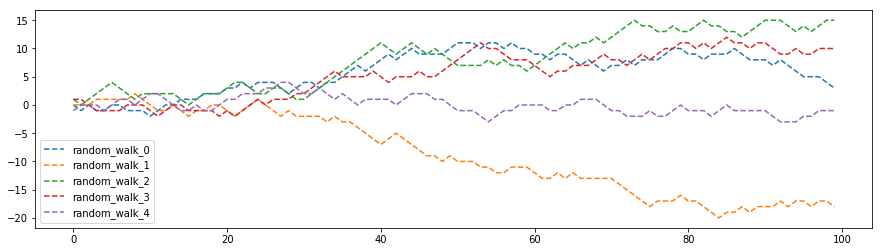

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
"""
- 그림에서 보는 것처럼 아주 단순하게 모델링한 결과인데 다음처럼 나오는 것을 알수 있다. 
- 지금은 step 별 결과를 -1, 0, 1로 두고 모두 같은 확률로 나온다고 가정했지만, 이것을 다르게 들수록 결과는 판이하게 달라질 수 있다. 
- 즉 만약 해당 모델이 random walk로 모델링이 된다고 해도, 이를 어떤 확률을 가졌고, 어떤 step으로 움직이는지를 찾는 것이 중요합니다. 
"""
plt.figure(figsize=(15, 4))
for i in range(0, 5):
    xs = np.array([np.random.choice([-1,0, 1]) for i in range(0, 100)])
    cum_xs = np.cumsum(xs)
    plt.plot(np.arange(0, len(xs)), cum_xs, linestyle='--', label='random_walk_{}'.format(i))
plt.legend()
plt.show()

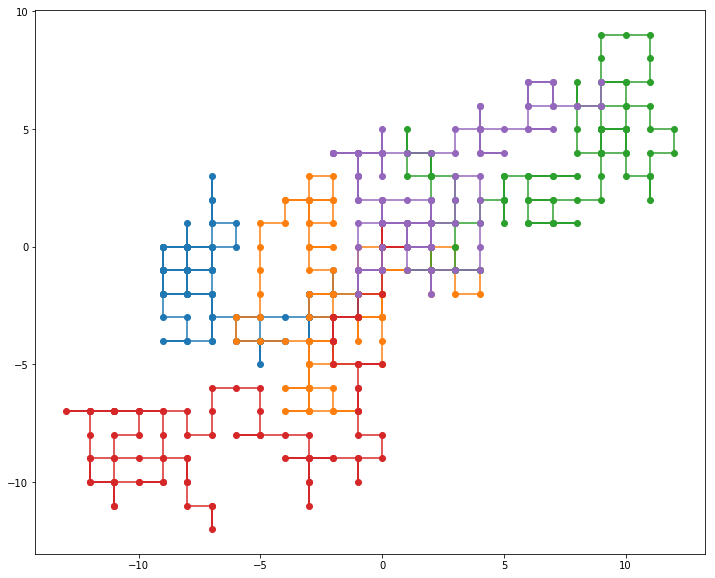

In [112]:
## random walk in 2dim

move_set = [[-1, 0], [1, 0], [0, -1], [0, 1]]

plt.figure(figsize=(12, 10))
for i in range(0, 5):
    moves = [[0, 0]]+[move_set[np.random.randint(0, len(move_set))] for i in range(0, 100)]
    moves = np.array([np.array(m) for m in moves])
    cum_moves = np.cumsum(moves, axis=0)
    plt.plot(cum_moves[:, 0], cum_moves[:, 1], marker='o')
plt.show()